Groupe :

Kévin TANG

Yann VINCENT

# I. Analyse du graphe ***club de karaté Zachary***


Le graphe du **club de Karaté Zachary**  a été introduit par Wayne Zachary
dans un article publié en 1977 et il est depuis l’un des exemples d’initiation les plus célèbres d’analyse de réseaux sociaux.  Ce dernier modélise les relations entre 34 membres du club de karaté : chaque nœud représente un individu, et les liens/arêtes représentent les individus qui interagissent en dehors du cadre du club de karaté (par exemple, passer du temps ensemble, comme se retrouver pour boire un café en dehors des horaires d’entrainements).


Nous allons utiliser la bibliothéque Networkx pour charger le graphe et l'analyser.

Documentation Networkx : https://networkx.org/documentation/stable/index.html


In [ ]:
import networkx as nx
G = nx.karate_club_graph()


***1. Caractéristiques du graphe Zachary Karaté Club***


1.   Quel le type de ce graphe? Orienté ou non orienté?
1.   Combien de noeuds y-a-t'il dans le graphe?
2.   Combien d'arêtes  y-a-t'il dans le graphe?
1.   Calculer le degrée moyen du graphe.









In [ ]:
# à faire : Répondre aux questions 1..4

# Question 1
graph_type = "Orienté" if nx.is_directed(G) else "Non orienté"
print(f"Type du graphe: {graph_type}")

# Question 2
num_nodes = G.number_of_nodes()
print(f"Nombre de nœuds dans le graphe: {num_nodes}")

# Question 3
num_edges = G.number_of_edges()
print(f"Nombre d'arêtes dans le graphe: {num_edges}")

# Question 4
average_degree = sum(dict(G.degree()).values()) / num_nodes
print(f"Degré moyen du graphe: {average_degree}")

##########################################

Type du graphe: Non orienté
Nombre de nœuds dans le graphe: 34
Nombre d'arêtes dans le graphe: 78
Degré moyen du graphe: 4.588235294117647


***2. Les attributs des noeuds***

Le graphe contient deux membres principaux, l’administrateur (officer) – M. John (nœud 33) et l'instructeur ( - M. Hi (nœud 0).  À la suite d’un conflit entre ces deux membres, le club s’est devisé en deux nouveaux clubs. Un club dirigé par M.  John et l’autre par M. Hi. Chaque membre du Club à décider de rejoindre un des deux nouveaux clubs.

Le choix du nouveau club de chaque membre est donnée par l'attribut 'club' de chaque noeud.

*   Afficher le choix du nouveau club de tous les membres
*   Visualiser le graphe en utilsant le layout circular_layout()
*   Afficher les noeuds ayant choisi Mr. Hi en rouge les autres en Bleu


Indication : https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw



In [ ]:
# à faire :  Afficher l'attribut 'club' de chaque membre
############# Votre code ici ############

for node, data in G.nodes(data=True):
    print(f"Nœud {node}: {data['club']}")

#########################################

Nœud 0: Mr. Hi
Nœud 1: Mr. Hi
Nœud 2: Mr. Hi
Nœud 3: Mr. Hi
Nœud 4: Mr. Hi
Nœud 5: Mr. Hi
Nœud 6: Mr. Hi
Nœud 7: Mr. Hi
Nœud 8: Mr. Hi
Nœud 9: Officer
Nœud 10: Mr. Hi
Nœud 11: Mr. Hi
Nœud 12: Mr. Hi
Nœud 13: Mr. Hi
Nœud 14: Officer
Nœud 15: Officer
Nœud 16: Mr. Hi
Nœud 17: Mr. Hi
Nœud 18: Officer
Nœud 19: Mr. Hi
Nœud 20: Officer
Nœud 21: Mr. Hi
Nœud 22: Officer
Nœud 23: Officer
Nœud 24: Officer
Nœud 25: Officer
Nœud 26: Officer
Nœud 27: Officer
Nœud 28: Officer
Nœud 29: Officer
Nœud 30: Officer
Nœud 31: Officer
Nœud 32: Officer
Nœud 33: Officer


In [ ]:

# à faire :  Recuperer la liste des membres du club Hi_Club
# Recuperer la liste des membres du club Officer_Club
Hi_club = []
Officer_Club = []
############# Votre code ici #################

for node, data in G.nodes(data=True):
    if data['club'] == 'Officer':
      Officer_Club.append(node)
    else:
      Hi_club.append(node)

#############################################

In [ ]:
# Vérification
print('Hi_club :', Hi_club)
print('Officer_Club :', Officer_Club)

Hi_club : [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]
Officer_Club : [9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


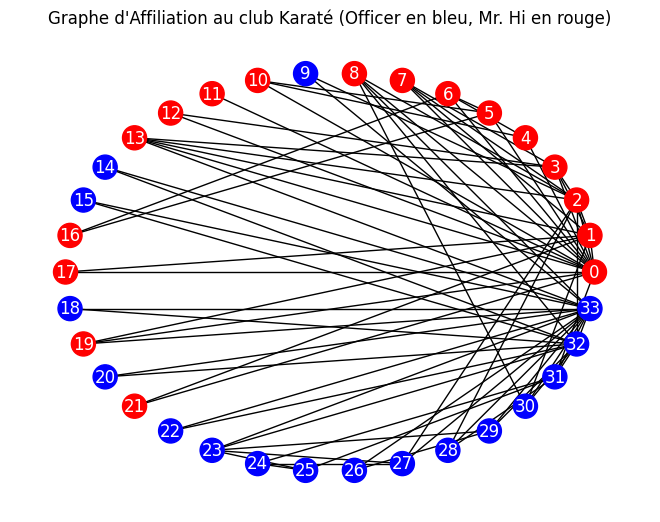

In [ ]:
# à faire : Visualiser le graphe

################################### Votre code ici ###############################################

import matplotlib.pyplot as plt
node_colors = ['blue' if data['club'] == 'Officer' else 'red' for _, data in G.nodes(data=True)]
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_color=node_colors, font_color='white')
plt.title("Graphe d'Affiliation au club Karaté (Officer en bleu, Mr. Hi en rouge)")
plt.show()

##################################################################################################

# II. Transformation du graphe en Tensor

On pourrait s'attendre à ce que la décision de chaque membre de rejoindre l’un des nouveaux clubs soit motivée par ses relations avec les autres membres du club. Donc, si nous avons un modèle des relations entre les individus (c'est-à-dire le graphe), nous devrions être en mesure de prédire le nouveau club  que chaque personne rejoindra.

***le plongement des noeuds du graphes nous donnera le pouvoir de faire cette prédiction !***


Avant de commencer, nous devons d'abord transformaer le graphe $G$ en Pytorch tensor pour qu'on puisse effectuer un apprentissage sur le graphe.


**1. Installation**

Verifier si Pytorch est bien installé

In [ ]:
import torch
print(torch.__version__)

2.1.0+cu118


**2. Mettez toutes les arêtes du graphe dans une liste, et puis  transformez la en Tensor `torch.LongTensor.**

**3. Quelle est la somme `torch.sum` de `pos_edge_index` tensor?**

In [ ]:
def graph_to_edge_list(G):
  # à faire : implementer la fonction qui retourne la liste
  # des arêtes d'un nx.Graph. La liste doit contenir des tuples
  # chaque tuple est un couple representant une arete connectant
  # deux noeuds.
  edge_list = []

  ############# Votre code ici ############

  edge_list = [(edge[0], edge[1]) for edge in G.edges()]

  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # à faire : implementer la fonction qui transoform edge_list en
  # tensor. Le Tensor à retourner doit avoir le shape [2 x len(edge_list)] = 2 x 78

  edge_index = torch.tensor([])

  ############# Votre code ici ############

  edge_index = torch.tensor(edge_list, dtype=torch.long).transpose(-2, -1)

  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


**Les arêtes positives et négatives :**

On appele une arête positive une arête qui existe dans le graphe et son étiquette est 1.
Une arête négative est une arête qui n'existe pas dans le graphe et son étiquette est 0.

**4. implementer la fonction suivante qui echantillonne des arêtes négatives.**

In [ ]:
import random

# Ne changez pas le random seed
torch.manual_seed(1)

def sample_negative_edges(G, num_neg_samples):
  # à Faire : Implementer le fonction qui retourne la liste des arêtes négatives.
  # Le nombre d'arêtes echantillonnées = num_neg_samples.
  # Faites attention, le karate club est un graphe non orienté
  # Si (0,1) est une arete positive, alors (1,0) est une arête positive egalement
  neg_edge_list = []

  ###############################Votre code ici#################################

  for node1 in G.nodes():
    for node2 in G.nodes():
      if node1 > node2 and not G.has_edge(node1, node2):
        neg_edge_list.append((node1, node2))

  ##############################################################################
  neg_edge_list = random.sample(neg_edge_list,num_neg_samples)

  return neg_edge_list

# Sample 78 arêtes negatives
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transformer la liste en vecteur
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

The neg_edge_index tensor has shape torch.Size([2, 78])


**3. Votre premier Plongement de noeuds**

Enfin, nous terminerons le premier algorithme d'apprentissage sur les graphes : un modèle de plongement de nœuds

**Configuration**

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

2.1.0+cu118


Pour écrire notre propore méthode d'apprentissage de plongement de nœuds, nous utiliserons principalement le module [`nn.Embedding`](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html) de PyTorch. Voyons comment utiliser `nn.Embedding`

In [ ]:
# Initialiser la couche de plongement
# Supoosons que nous voulons plonger 4 noeuds
# chaque noeud sera representé par un vecteur de 8 dimensions
emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


Nous pouvons sélectionner des éléments de la matrice de plongement, en utilisant les indices des Tensors

In [ ]:
# Selectionner un vecteur de plongement de la matrice emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Selectionner plusieurs plongements (le 1er et le 3eme)
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Afficherle shape de la matrice des poids des plongements
shape = emb_sample.weight.data.shape
print(shape)

# Ecraser tous les poids par un tensor contenant que des 1
emb_sample.weight.data = torch.ones(shape)

# Verifions, si les plogements ont été bien initialisés
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[-0.7121,  0.3037, -0.7773, -0.2515, -0.2223,  1.6871,  0.2284,  0.4676]],
       grad_fn=<EmbeddingBackward0>)
tensor([[-0.7121,  0.3037, -0.7773, -0.2515, -0.2223,  1.6871,  0.2284,  0.4676],
        [ 1.1017, -0.1759, -2.2456, -1.4465,  0.0612, -0.6177, -0.7981, -0.1316]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


Nous allons maintenant créer la matrice de plongement des noeuds du graphe Karaté Club.
On veut representer chaque noeud par un vecteur de $16$ dimensions. On veut egalement initialiser la matrice par des nombres réels entre $[0,1[$ issus d'une distribution uniforme. on vous suggére d'utiliser` torch.rand`

In [ ]:
# Ne changez pas le random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # à faire : implementer cette fonction qui va créer le matrice de plongements
  # de noeuds.
  # Cette fonction retournera une couche torch.nn.Embedding
  # la matrice de poids de la couche retournée doit etre inialiaser par une
  # distrbution unifrom

  emb = None

  ###################################Votre Code ici ###############################

  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
  emb.weight.data = torch.rand((num_node, embedding_dim))

  ################################################################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([1, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 1 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2796, 0.3273, 0.3835, 0.2156, 0.6563, 0.5041, 0.1733, 0.2145, 0.6059,
         0.4929, 0.8539, 0.4242, 0.0949, 0.1302, 0.3532, 0.3893],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


**Visualiser vos plongements**

Pour bien comprendre la notion de plongement, il est indispensable de visualiser les vecteurs de plongement dans un espace 2D.
La fonction  ci-dessous permet de  visualiser les plongements dans un esapce 2D. La fonction effectue  une ACP pour réduire la dimensionnalité des plongements à un espace 2D.

Visualisez ensuite chaque point, coloré par la communauté à laquelle il appartient (dans cette example son nouveau club).

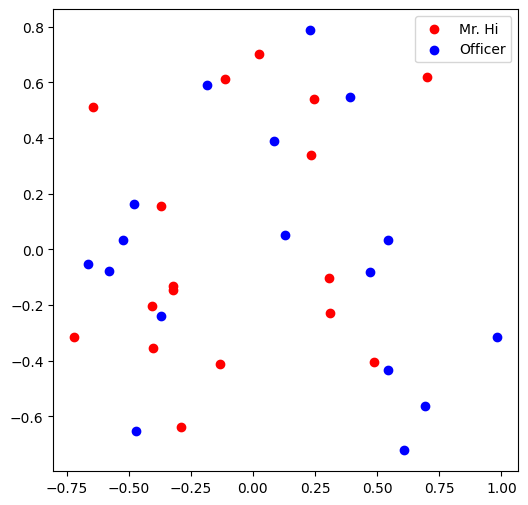

In [ ]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualiser les plongements initiaux aléatoires
visualize_emb(emb)

**Entrainer votre modele !**

In [ ]:
from torch.optim import SGD

def accuracy(pred, label):
  # à faire: Implémenter la fonction d'accuracy. Cette fonction prend le
  # tensor pred (le tensor résultant après Sigmod) et son label (torch.LongTensor).
  # Une valeur pred supérieure à 0,5 : arête sera classée 1 sinon 0 .

  accu = 0.0

  ##################Votre code ici ###########################

  predicted_classes = (pred>0.5).float()
  correct= (predicted_classes == label).float()
  accu = correct.sum() / len(correct)

  ###########################################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # à faire: Entrainemenet de la couche embedding. Vous pouvez changer
  # le nombre d'epochs et le learning rate
  # Ce que vous devez implémenter :
  # (1) Récuperer les plongements des noeuds dans train_edge
  # (2) Calculer le produit scalaire des plognements des deux vecteurs de chaque arete
  # (3) Appliquer la fonction Sigmoid au  résultat du produit scalaire
  # (4) Calculer la loss en utilisant la fonction loss_fn
  # (5) Afficher la loss et l'accuracy de chaque epoch
  #  Indication : la loss devrait diminuer pendant l'entrainement

  epochs = 5000
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):

    ############# Votre code ici ############

    # (1) Récupérer les plongements des nœuds dans train_edge
    node_emb = emb(train_edge)

    # (2) Calculer le produit scalaire des plongements des deux vecteurs de chaque arête
    prod_scalaire = (node_emb[0] * node_emb[1]).sum(dim=1)

    # (3) Appliquer la fonction Sigmoid au résultat du produit scalaire
    predictions = sigmoid(prod_scalaire)

    # (4) Calculer la loss en utilisant la fonction loss_fn
    loss = loss_fn(predictions, train_label)

    # (5) Afficher la loss et l'accuracy de chaque epoch
    if i % 100 == 0:
        accu = accuracy(predictions, train_label)
        print(f"Epoch {i}, Loss: {loss.item()}, Accuracy: {accu}")

    optimizer.zero_grad()
    # Rétropropagation de la loss
    loss.backward()
    # Mise à jour des poids
    optimizer.step()

    #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

# Génerer  les labels positifs et négatifs
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concatener les labels positifs and negatifs dans un tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concatener les aretes positives et negatives dans un tensor
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)

train(emb, loss_fn, sigmoid, train_label, train_edge)

Epoch 0, Loss: 1.948059320449829, Accuracy: 0.5
Epoch 100, Loss: 0.2959466576576233, Accuracy: 0.9487179517745972
Epoch 200, Loss: 0.10519908368587494, Accuracy: 1.0
Epoch 300, Loss: 0.048154134303331375, Accuracy: 1.0
Epoch 400, Loss: 0.028446730226278305, Accuracy: 1.0
Epoch 500, Loss: 0.019365927204489708, Accuracy: 1.0
Epoch 600, Loss: 0.014350426383316517, Accuracy: 1.0
Epoch 700, Loss: 0.011239750310778618, Accuracy: 1.0
Epoch 800, Loss: 0.009151069447398186, Accuracy: 1.0
Epoch 900, Loss: 0.007665715180337429, Accuracy: 1.0
Epoch 1000, Loss: 0.006562645547091961, Accuracy: 1.0
Epoch 1100, Loss: 0.005715330597013235, Accuracy: 1.0
Epoch 1200, Loss: 0.005046630743891001, Accuracy: 1.0
Epoch 1300, Loss: 0.004507089965045452, Accuracy: 1.0
Epoch 1400, Loss: 0.004063672386109829, Accuracy: 1.0
Epoch 1500, Loss: 0.003693551290780306, Accuracy: 1.0
Epoch 1600, Loss: 0.003380464157089591, Accuracy: 1.0
Epoch 1700, Loss: 0.0031125624664127827, Accuracy: 1.0
Epoch 1800, Loss: 0.0028810019

**Visualiser le nouveau plognement**

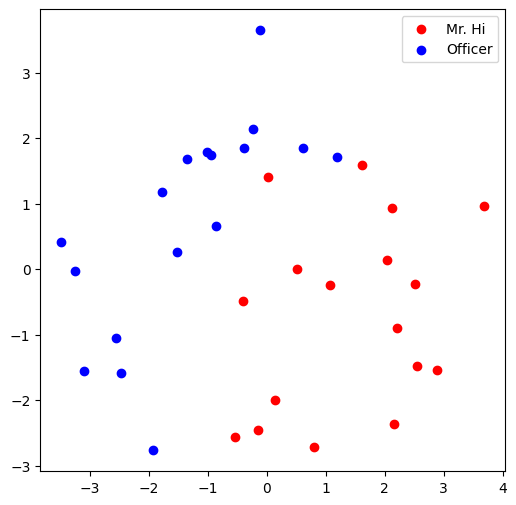

In [ ]:
# Visualiser le dernier plongment appris
visualize_emb(emb)